In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

### 1. Pre-process the dataset

In [15]:
data = pd.read_csv('uber.csv')  # Load the dataset
data.dropna(inplace=True)  # Handle missing data

In [16]:
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Identify Outliers (you can add outlier handling techniques here)

### 3. Check the Correlation

NameError: name 'plt' is not defined

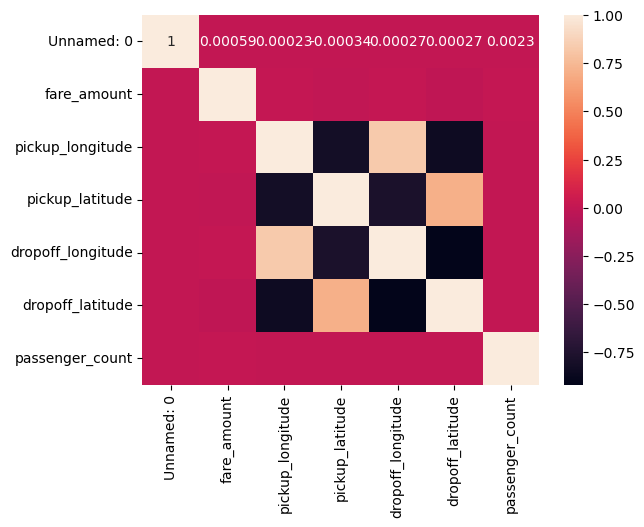

In [20]:
# 3. Check the correlation
# Exclude the 'pickup_datetime' column for correlation analysis
correlation_matrix = data.drop(['pickup_datetime', 'key'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()



### 4. Implement Linear Regression and Ridge/Lasso Regression Models

In [21]:
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

### Create a pipeline that scales the input features and transforms the target variable

In [22]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', lr)  # Apply Linear Regression
])

In [23]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', ridge)  # Apply Ridge Regression
])

In [24]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', lasso)  # Apply Lasso Regression
])

### Fit the models

In [25]:
pipeline_lr.fit(X_train, y_train)
pipeline_ridge.fit(X_train, y_train)
pipeline_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Lasso())])

### 5. Evaluate the Models

In [26]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

In [27]:
r2_lr, rmse_lr, mae_lr = evaluate_model(pipeline_lr, X_test, y_test)
r2_ridge, rmse_ridge, mae_ridge = evaluate_model(pipeline_ridge, X_test, y_test)
r2_lasso, rmse_lasso, mae_lasso = evaluate_model(pipeline_lasso, X_test, y_test)

In [28]:
print("Linear Regression - R2:", r2_lr, "RMSE:", rmse_lr, "MAE:", mae_lr)
print("Ridge Regression - R2:", r2_ridge, "RMSE:", rmse_ridge, "MAE:", mae_ridge)
print("Lasso Regression - R2:", r2_lasso, "RMSE:", rmse_lasso, "MAE:", mae_lasso)

Linear Regression - R2: 0.00034152697863043535 RMSE: 10.197470623964248 MAE: 6.068508583048691
Ridge Regression - R2: 0.0003415255557153163 RMSE: 10.197470631221794 MAE: 6.068508571062478
Lasso Regression - R2: -1.2270548227721889e-05 RMSE: 10.199275000569145 MAE: 6.069560575923911
